In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import os, h5py
import tensorflow as tf

from msfm.utils.input_output import read_yaml

In [2]:
conf_dir = "../../configs/config.yaml"
conf = read_yaml(conf_dir)

n_side = conf["analysis"]["n_side"]
n_pix = conf["analysis"]["n_pix"]

In [22]:
pix_file = "../../data/DESY3_pixels_512.h5"
with h5py.File(pix_file, "r") as f:
    data_vec_pix = f["metacal/map_cut_outs/data_vec_ids"][:]
    non_tomo_patches_pix = f["metacal/masks/RING/non_tomo"][:]

In [19]:
data_vector_file = "/Users/arne/data/CosmoGrid_example/DES/grid/cosmo_000001/data_vectors.h5"

with h5py.File(data_vector_file, "r") as f:
    print(f.keys())
    print(f["kg"])
    kg_dvs = f["kg"][:]

<KeysViewHDF5 ['ia', 'kg']>
<HDF5 dataset "kg": shape (16, 463872, 4), type "<f4">


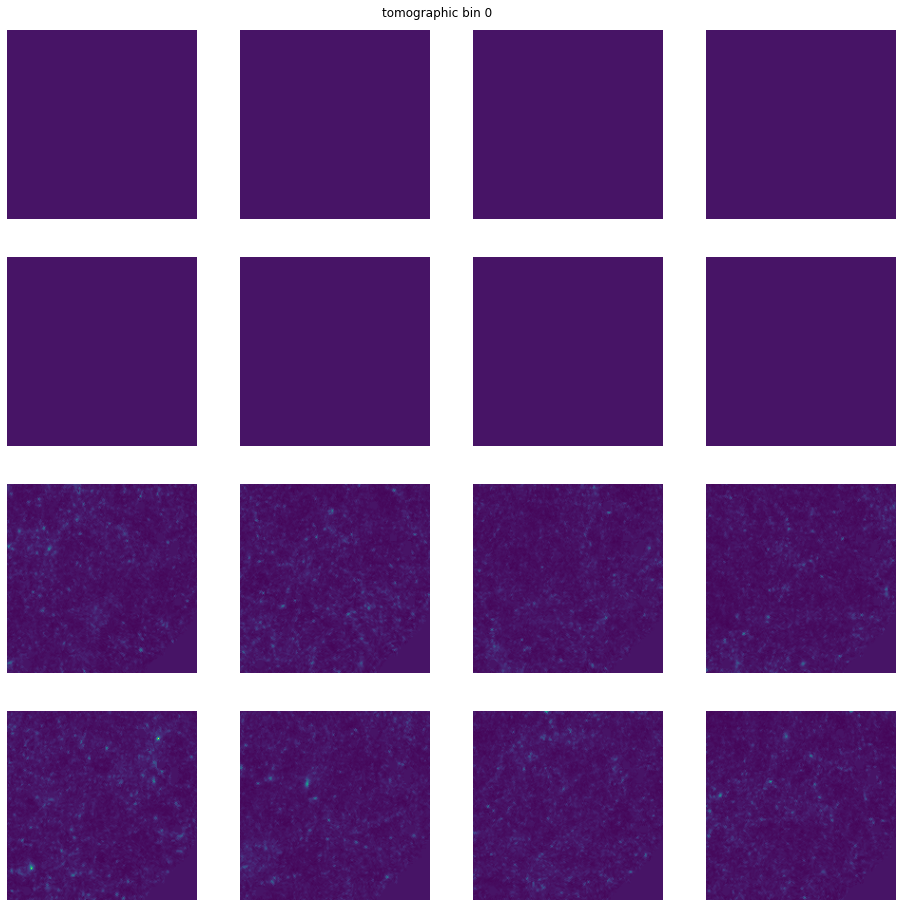

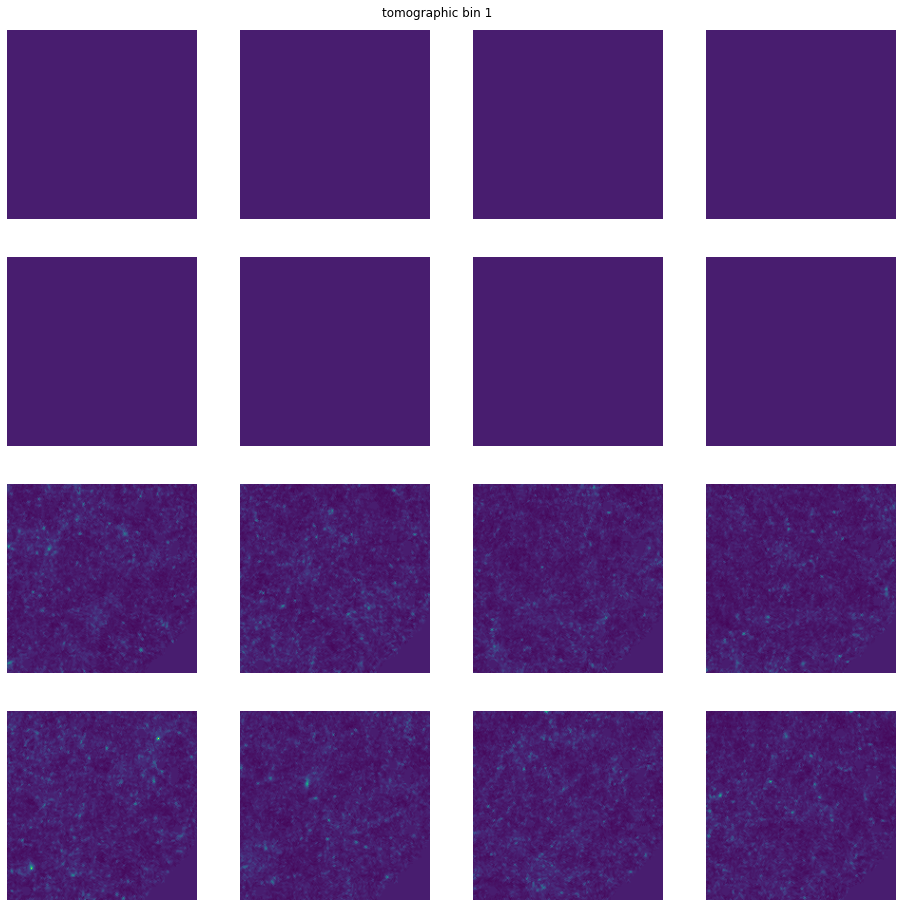

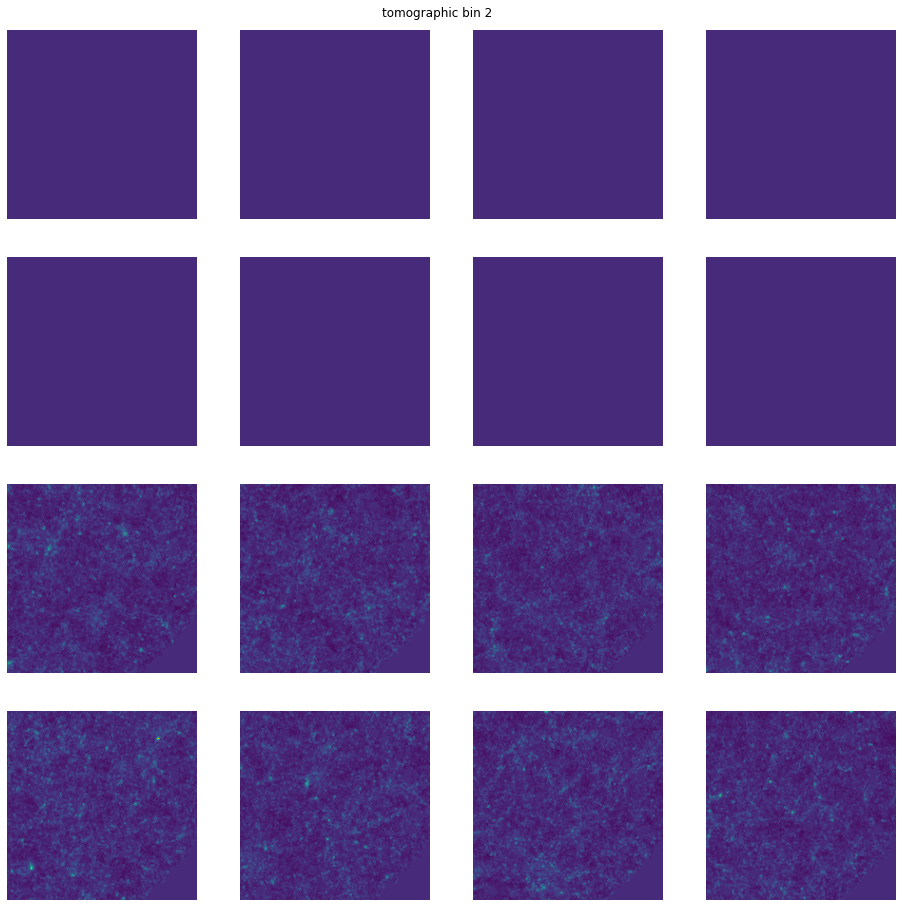

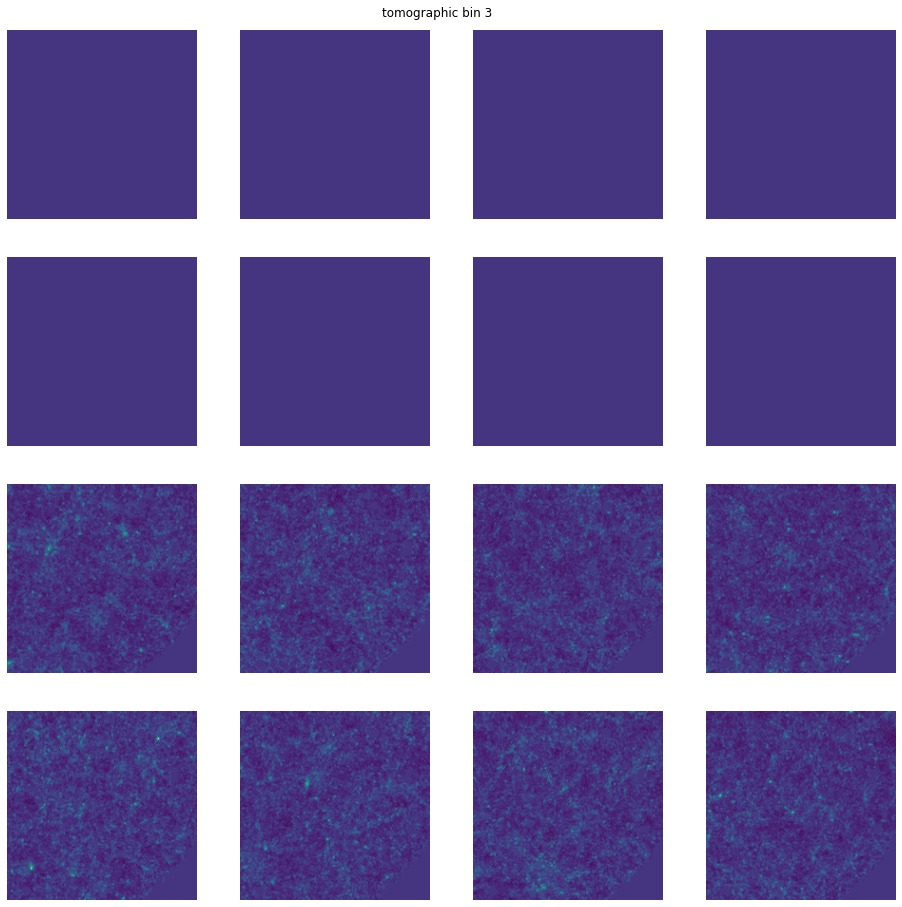

In [20]:
vmin = kg_dvs.min()
vmax = kg_dvs.max()

for tomo in range(4):
    kg_dv_non_tomo = kg_dvs[:,:,tomo]
    
    vmin = kg_dv_non_tomo.min()
    vmax = kg_dv_non_tomo.max()

    gnoms = []
    for i, kg_dv in enumerate(kg_dv_non_tomo):
        kg_map = np.full(n_pix, hp.UNSEEN)
        kg_map[data_vec_pix] = kg_dv

        patch = i % 4
        perm = i // 4
        # hp.mollview(kg_map, nest=True, title=f"tomographic bin {tomo}, patch {patch}, permutation {perm}", min=vmin, max=vmax)

        kg_map[kg_map==hp.UNSEEN] = 0
        gnom = hp.gnomview(kg_map, nest=True, min=vmin, max=vmax, rot=(90, -30, 0), reso=5, return_projected_map=True, no_plot=True)
        gnoms.append(gnom)

    gnoms = np.array(gnoms)

    fig, ax = plt.subplots(figsize=(16, 16), ncols=4, nrows=4, sharex=True, sharey=True)
    vmin = np.stack(gnoms).min()
    vmax = np.stack(gnoms).max()
    k = 0
    for i in range(4):
        for j in range(4):
            ax[i,j].imshow(gnoms[k], vmin=vmin, vmax=vmax)
            ax[i,j].axis('off')

            k += 1

    fig.suptitle(f"tomographic bin {tomo}", y=0.9)


In [25]:
patches_file = "/Users/arne/data/CosmoGrid_example/DES/grid/cosmo_000001/data_patches.h5"

with h5py.File(patches_file, "r") as f:
    print(f.keys())
    print(f["kg"])
    kg_patches = f["kg"][:]

<KeysViewHDF5 ['ia', 'kg']>
<HDF5 dataset "kg": shape (16, 369764, 4), type "<f4">


/Users/arne/miniforge3/envs/py39/lib/python3.9/site-packages/healpy/visufunc.py:468: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = pylab.figure(fig, figsize=(5.8, 6.4))


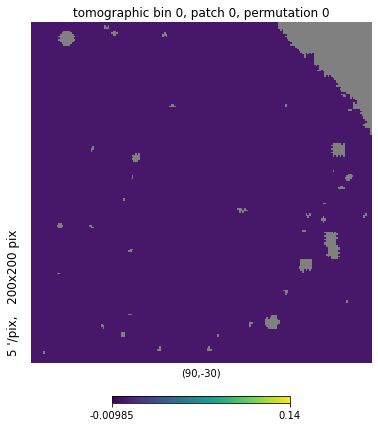

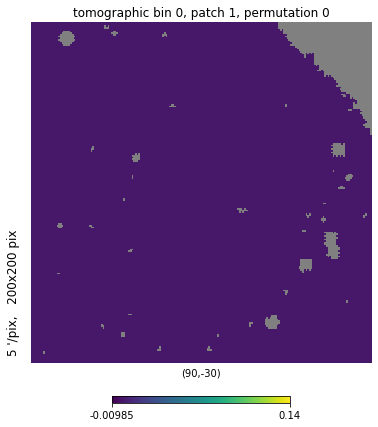

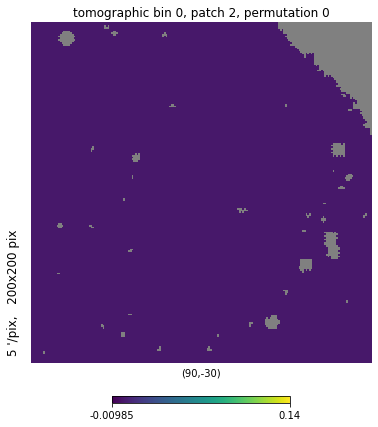

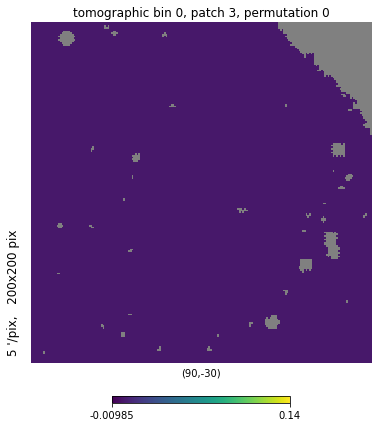

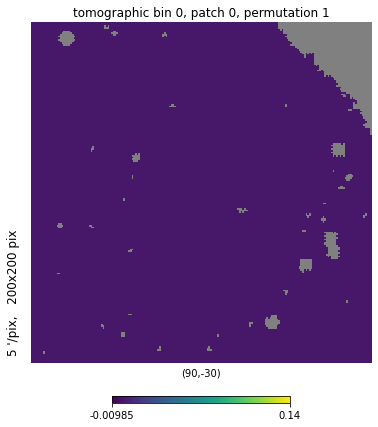

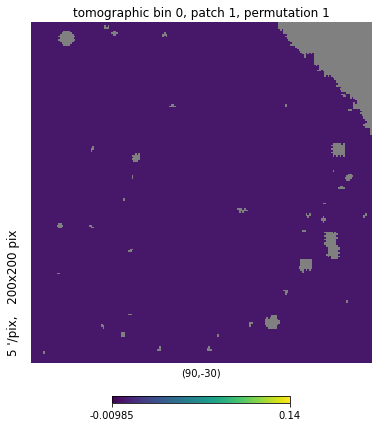

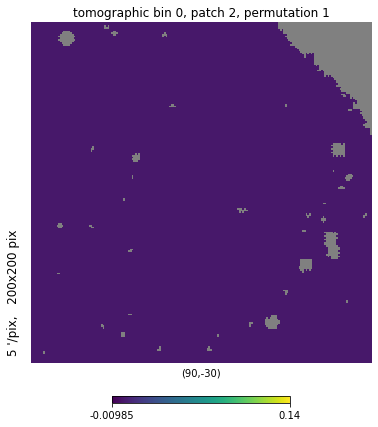

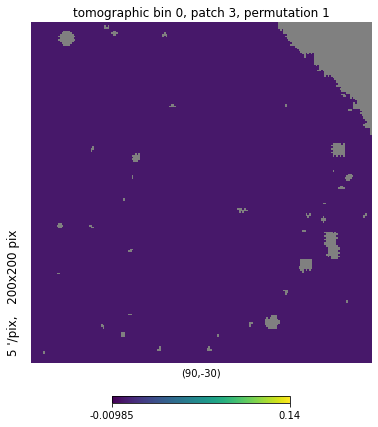

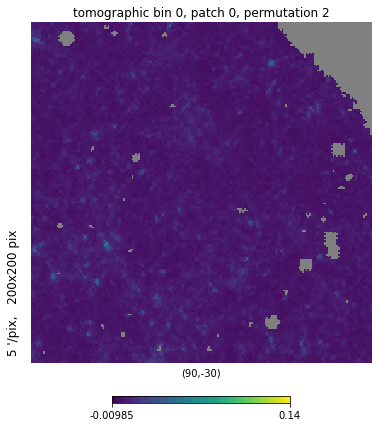

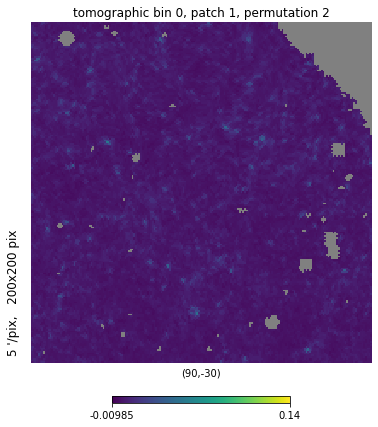

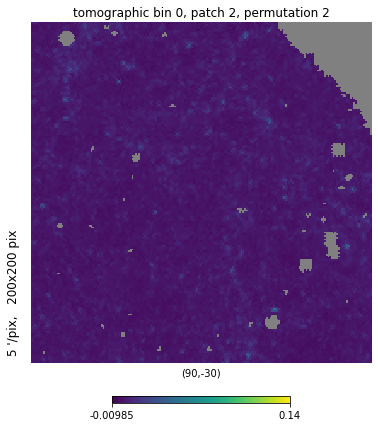

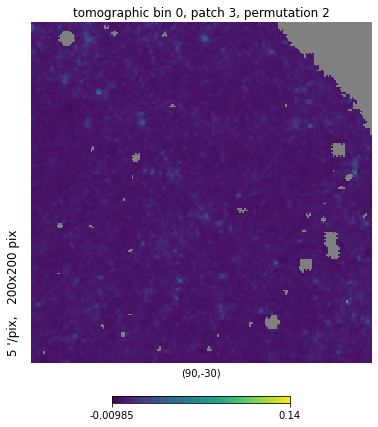

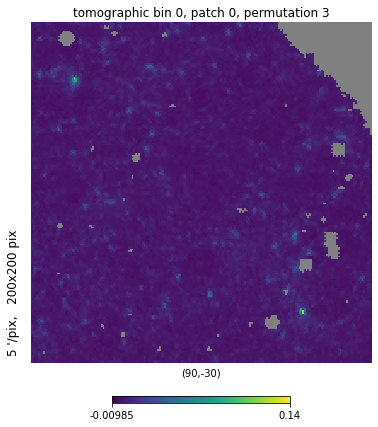

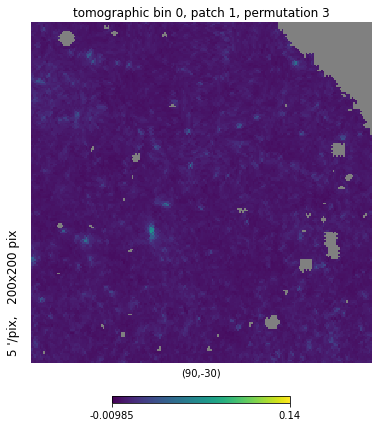

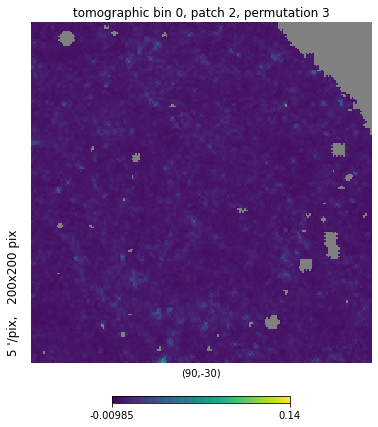

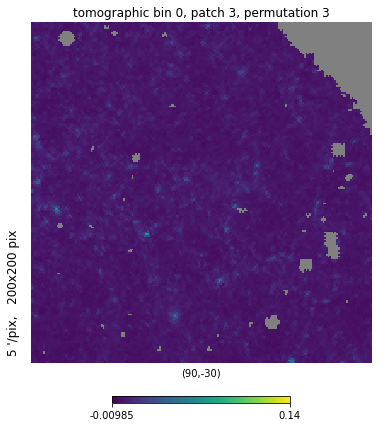

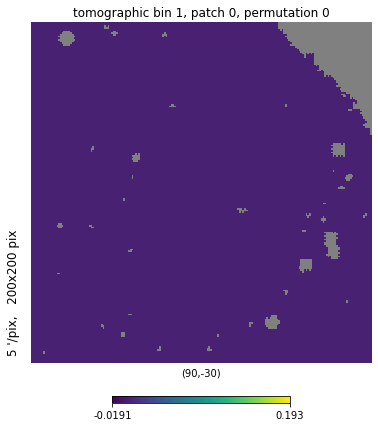

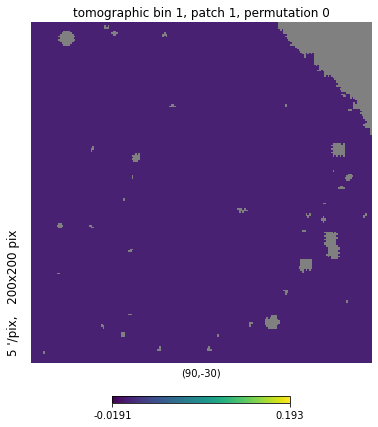

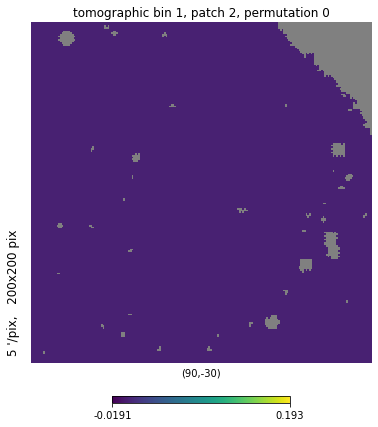

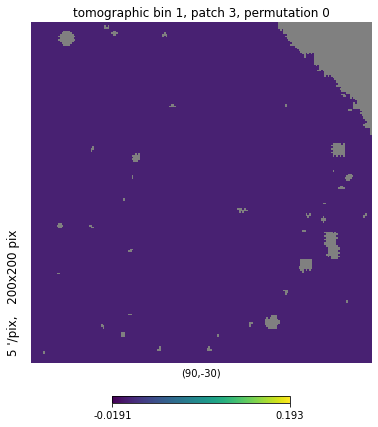

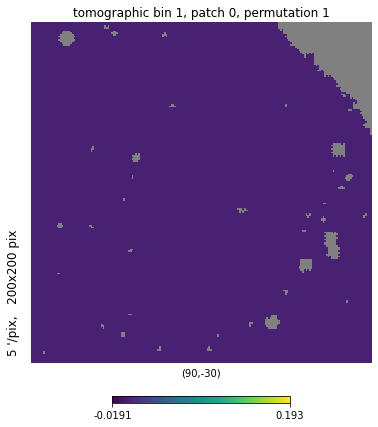

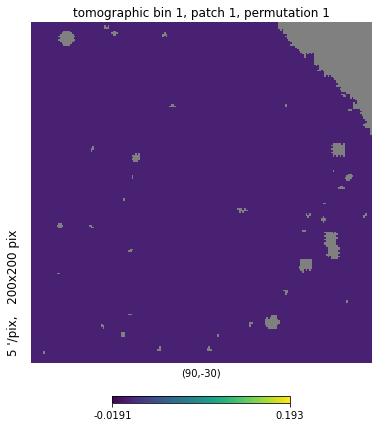

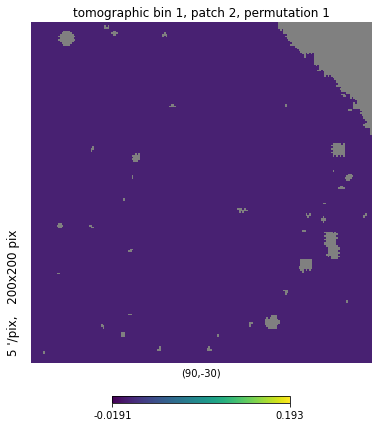

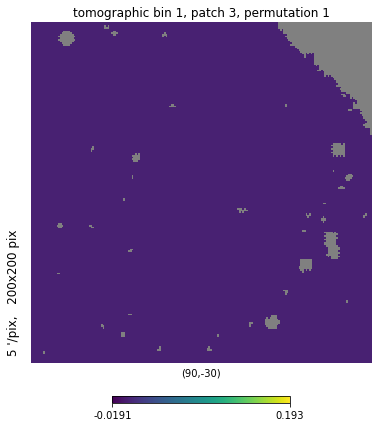

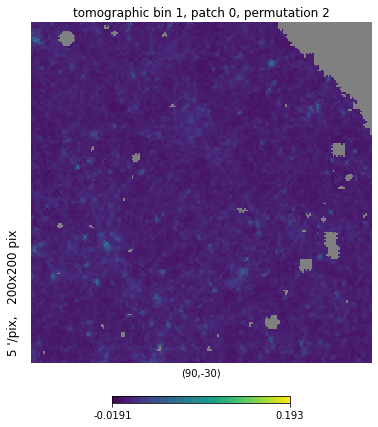

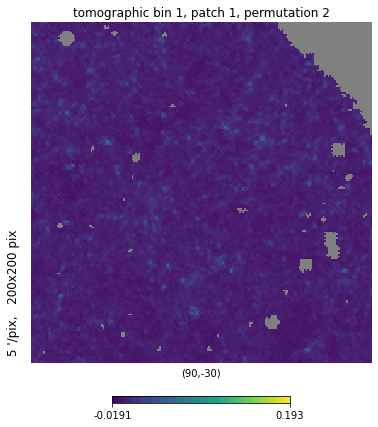

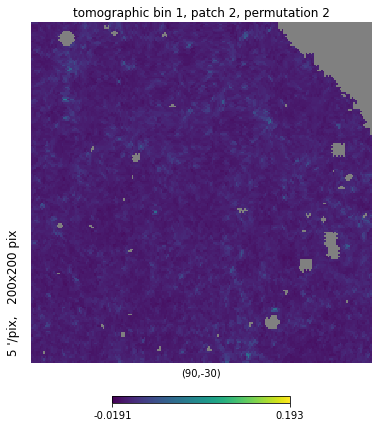

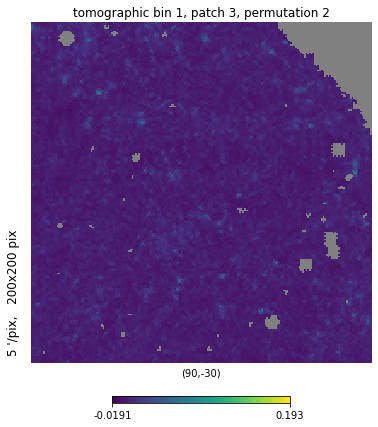

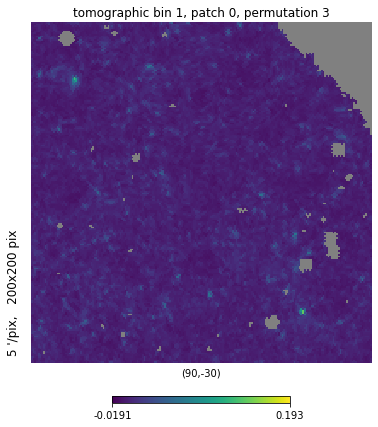

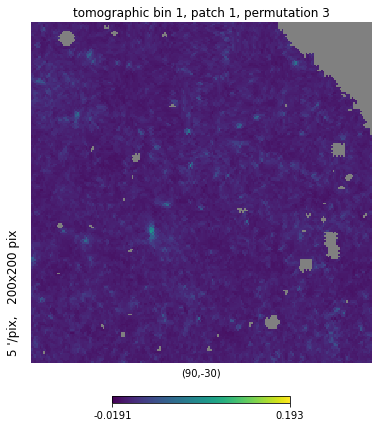

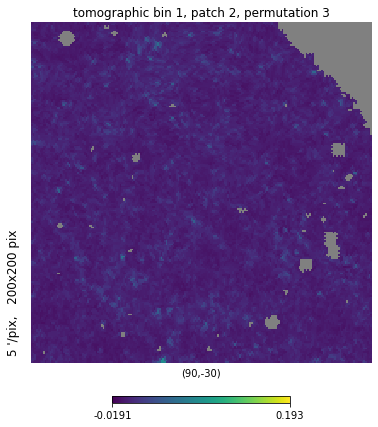

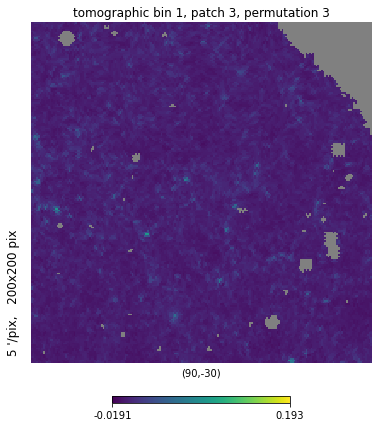

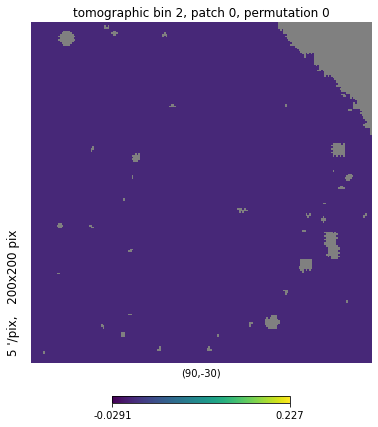

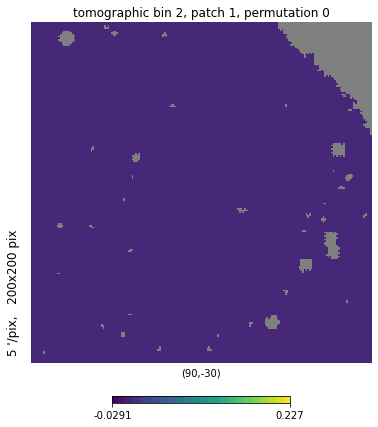

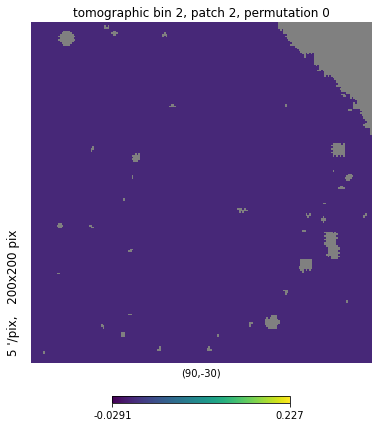

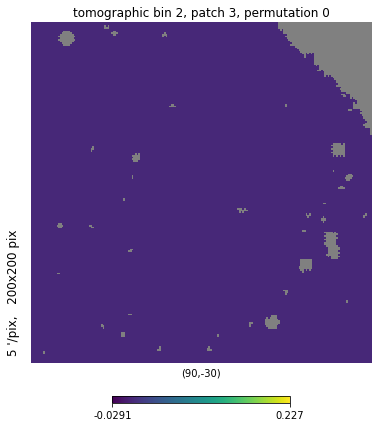

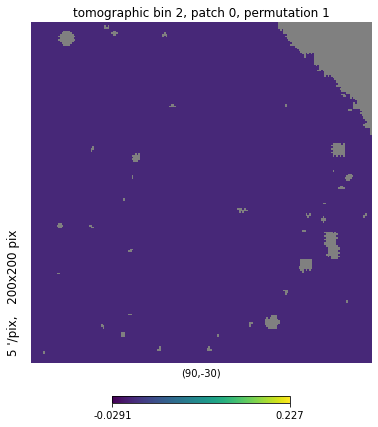

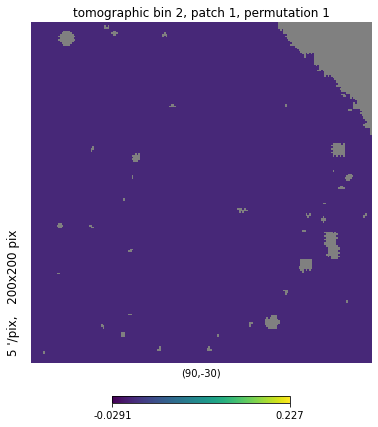

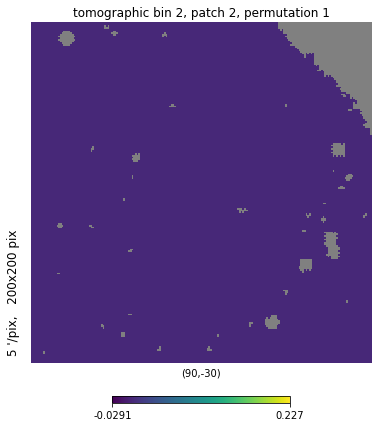

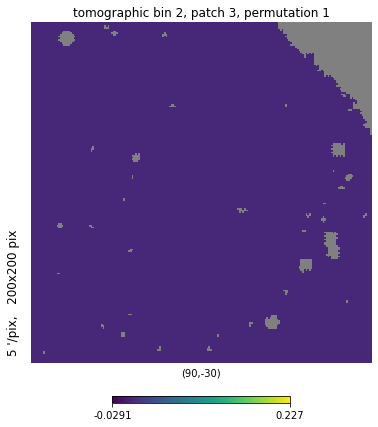

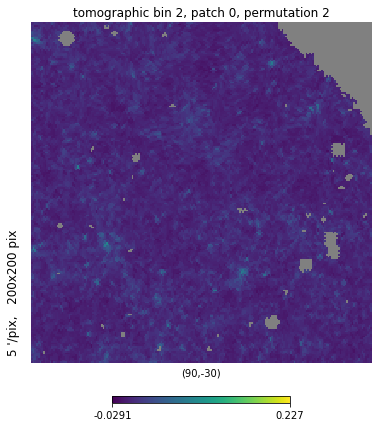

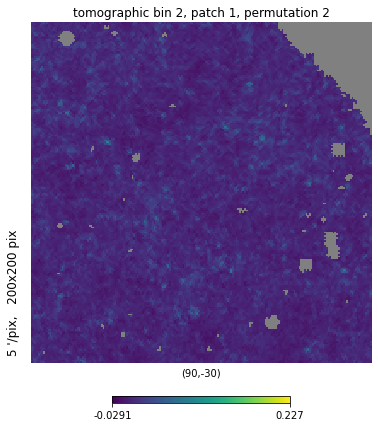

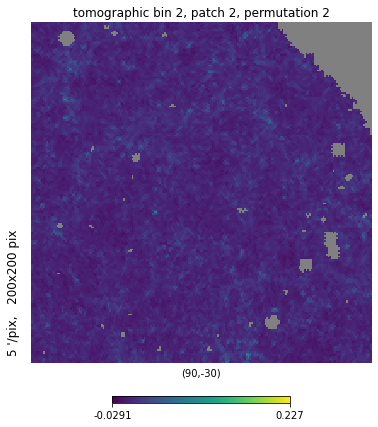

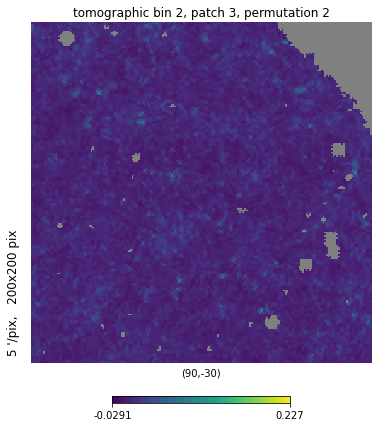

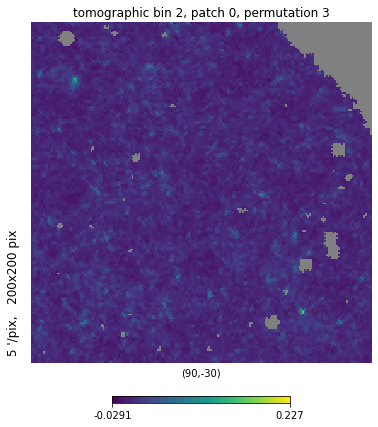

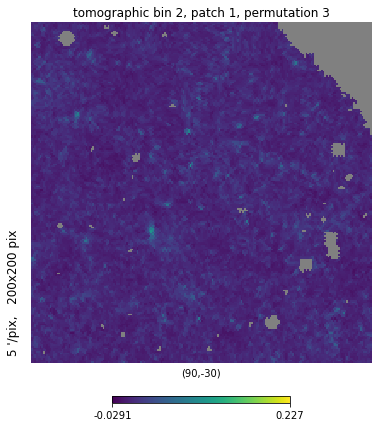

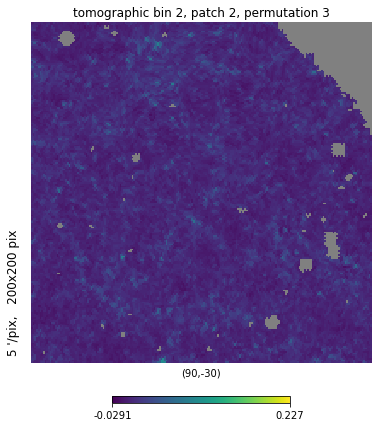

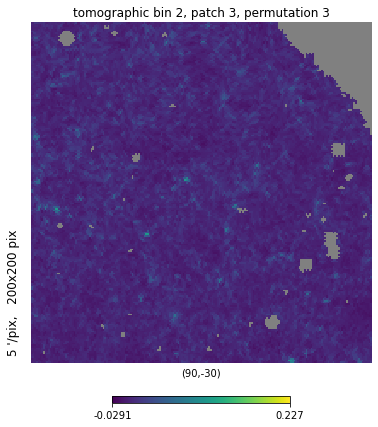

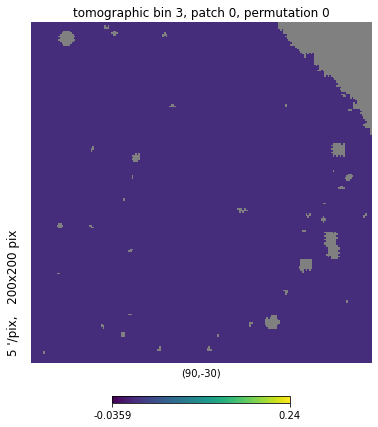

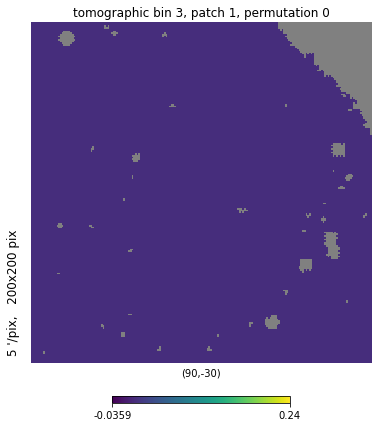

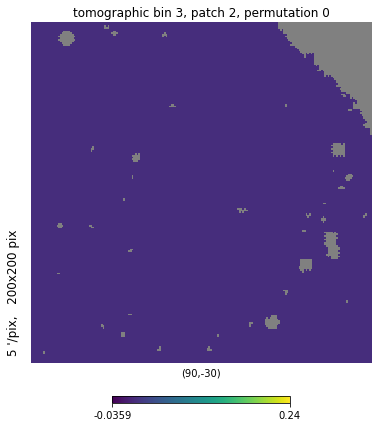

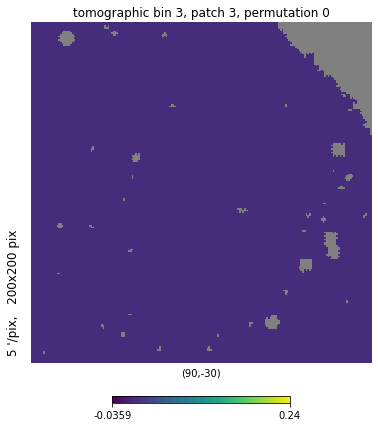

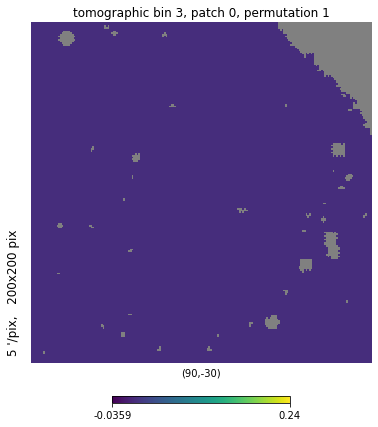

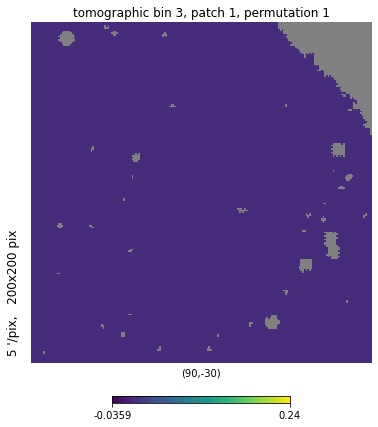

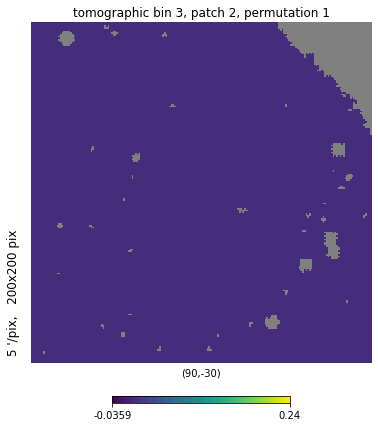

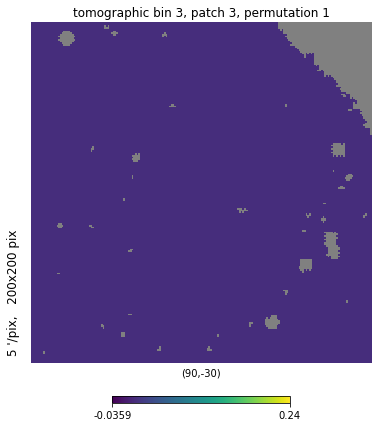

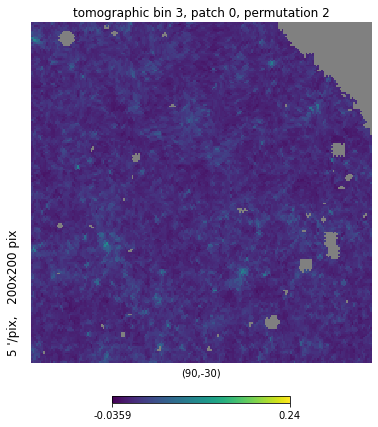

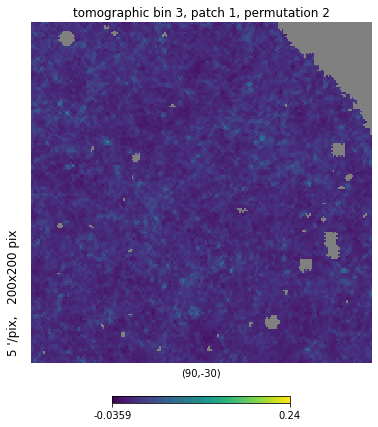

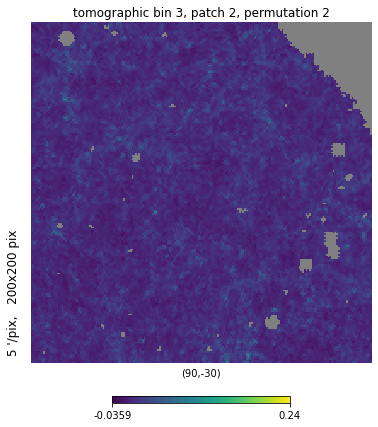

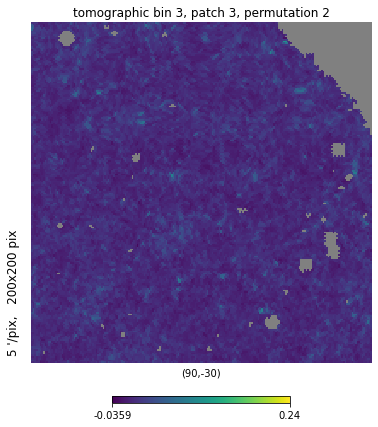

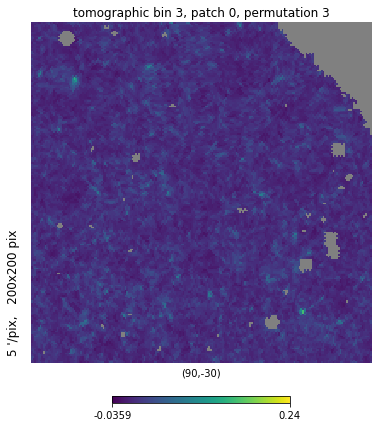

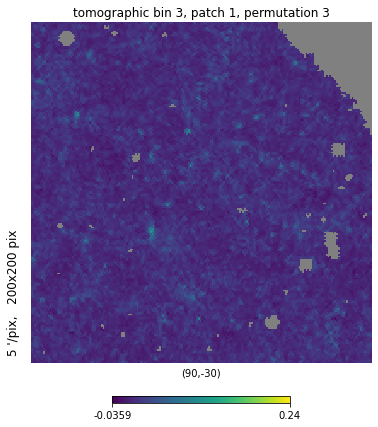

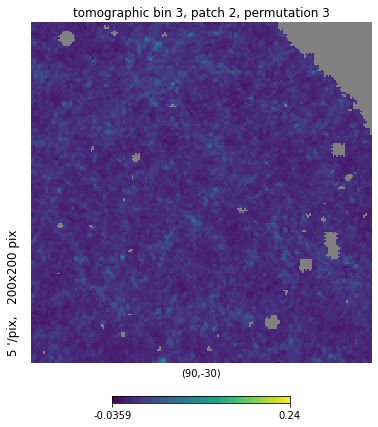

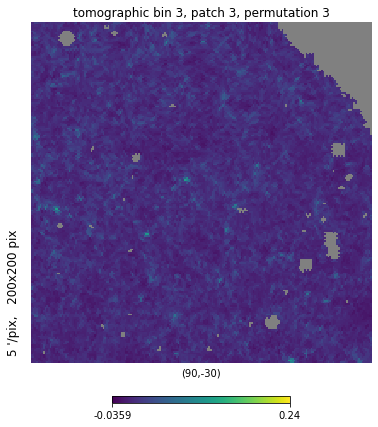

In [33]:
vmin = kg_dvs.min()
vmax = kg_dvs.max()

for tomo in range(4):
    kg_patches_non_tomo = kg_patches[:,:,tomo]
    
    vmin = kg_patches_non_tomo.min()
    vmax = kg_patches_non_tomo.max()

    gnoms = []
    for i, kg_kg_patch in enumerate(kg_patches[:,:,tomo]):
        kg_map = np.full(n_pix, hp.UNSEEN)
        kg_map[non_tomo_patches_pix] = kg_kg_patch

        patch = i % 4
        perm = i // 4
        # hp.mollview(kg_map, title=f"tomographic bin {tomo}, patch {patch}, permutation {perm}", min=vmin, max=vmax)
        gnom = hp.gnomview(kg_map, min=vmin, max=vmax, rot=(90, -30, 0), reso=5, return_projected_map=True, no_plot=False, title=f"tomographic bin {tomo}, patch {patch}, permutation {perm}")
